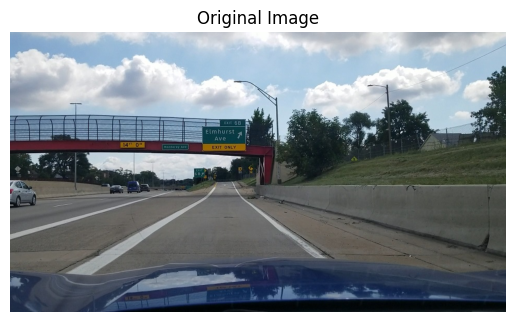

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image using OpenCV
image_color = cv2.imread('new_test_image_3.jpg')

# Check if the image is loaded successfully
if image_color is None:
    print("Error: Image not found or failed to load.")
else:
    # Convert BGR to RGB for displaying using matplotlib
    image_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')  # Hide axis
    plt.show()

(540, 956, 3)

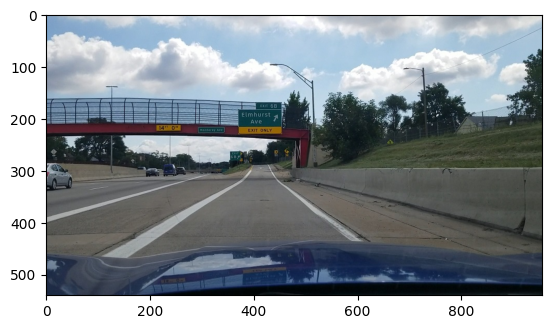

In [ ]:
image_c = mpimg.imread('new_test_image_3.jpg')
plt.imshow(image_c)
image_c.shape


(540, 956)

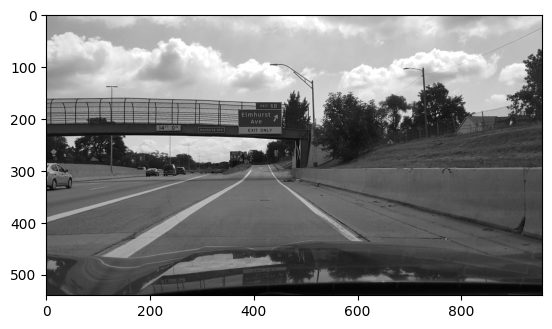

In [ ]:
image_g = cv2.cvtColor(image_c, cv2.COLOR_RGB2GRAY)
plt.imshow(image_g, cmap = 'gray')
image_g.shape

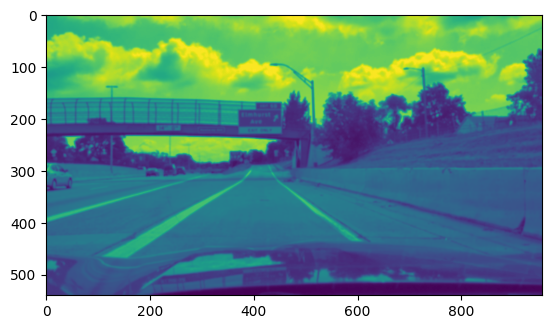

In [ ]:
image_blurred = cv2.GaussianBlur(image_g, (7, 7), 0)
plt.imshow(image_blurred)

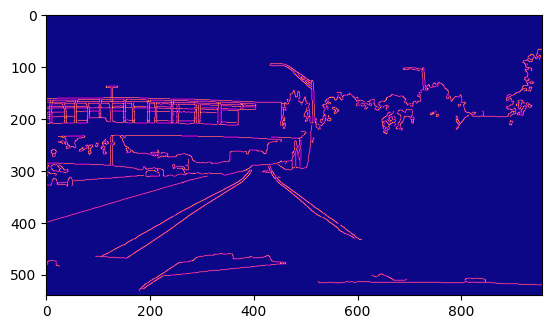

In [ ]:
threshold_low = 10
threshold_high = 200

image_canny = cv2.Canny(image_blurred, threshold_low, threshold_high)
plt.imshow(image_canny, cmap = 'plasma')

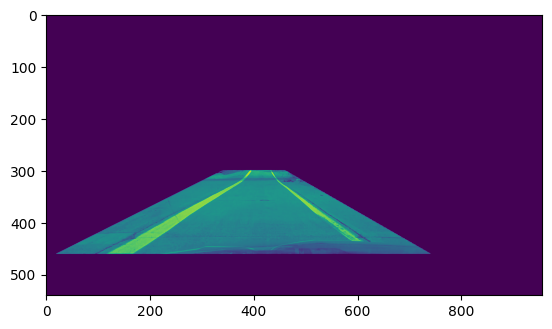

In [ ]:
# Visualize the region of interest
vertices = np.array([[(20,460),(340, 300), (460, 300), (740,460)]], dtype=np.int32)
mask = np.zeros_like(image_g)
cv2.fillPoly(mask, vertices, 255)
masked_image = cv2.bitwise_and(image_g, mask)
plt.figure()
plt.imshow(masked_image)

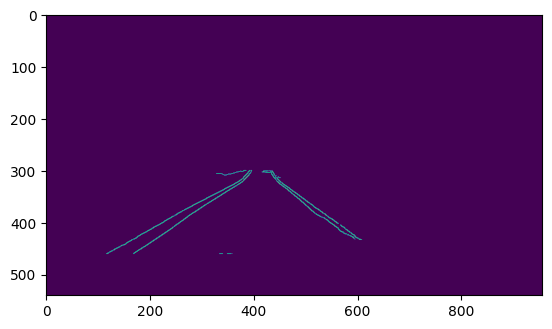

In [ ]:
masked_image = cv2.bitwise_and(image_canny, mask)
plt.figure()
plt.imshow(masked_image)

In [ ]:
rho = 2            # distance resolution in pixels
theta = np.pi/180  # angular resolution in radians
threshold = 40     # minimum number of votes
min_line_len = 100  # minimum number of pixels making up a line
max_line_gap = 50  # maximum gap in pixels between connectable line segments
lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)

# Create an empty black image
line_image = np.zeros((masked_image.shape[0], masked_image.shape[1], 3), dtype=np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), [255, 0, 0], 20)
lines

array([[[120, 459, 263, 377]],

       [[168, 460, 389, 311]],

       [[419, 301, 607, 433]],

       [[255, 382, 382, 317]],

       [[118, 460, 226, 400]],

       [[116, 460, 311, 352]]], dtype=int32)

In [ ]:
α = 1
β = 1
γ = 0

# Resultant weighted image is calculated as follows: original_img * α + img * β + γ
Image_with_lines = cv2.addWeighted(image_c, α, line_image, β, γ)


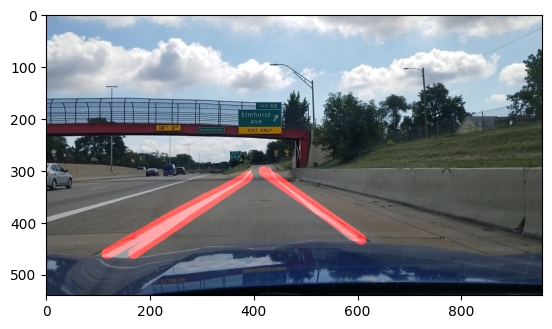

In [ ]:
plt.figure()
plt.imshow(Image_with_lines)

In [2]:
!git clone https://github.com/confidentrf/ai.git


Cloning into 'ai'...
